In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Should be same as np.fft
from scipy import fft

(<Figure size 900x300 with 3 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'FT Amplitude'}>,
        <Axes: title={'center': 'FT Log Amplitude'}>], dtype=object))

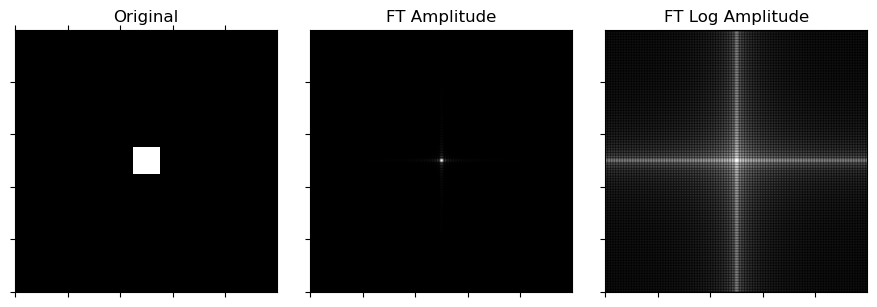

In [19]:
# Basic: 2D FT


def plot_imgft(input_image):
    '''
    We're gonna visualize this thing several times,
    so we might as well put it in a function.
    '''
    # Perform 2D FFT, then use fftshift
    # to make sure the zero-frequency is
    # as the center of the image. 
    Zft = fft.fft2(input_image)
    Zft = fft.fftshift(Zft)

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    ## 
    axs[0].matshow(input_image, cmap="gray", origin="lower")
    axs[0].set_title("Original")
    ##
    axs[1].imshow(np.abs(Zft), cmap="gray", origin="lower")
    axs[1].set_title("FT Amplitude")
    ##
    axs[2].imshow(np.log(1 + np.abs(Zft)), cmap="gray", origin="lower")
    axs[2].set_title("FT Log Amplitude")

    ## Cosmetic
    for ax in axs:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    fig.tight_layout()

    return fig, axs
    
# Produce a "meshgrid"
pos = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(pos, pos)

R1 = 1
R2 = 0.5
Z = X**2 + Y**2
Z = 1*(X < NUM) * (X > -NUM) * (Y < NUM) * (Y > -NUM)

plot_imgft(Z)

(<Figure size 900x300 with 3 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'FT Amplitude'}>,
        <Axes: title={'center': 'FT Log Amplitude'}>], dtype=object))

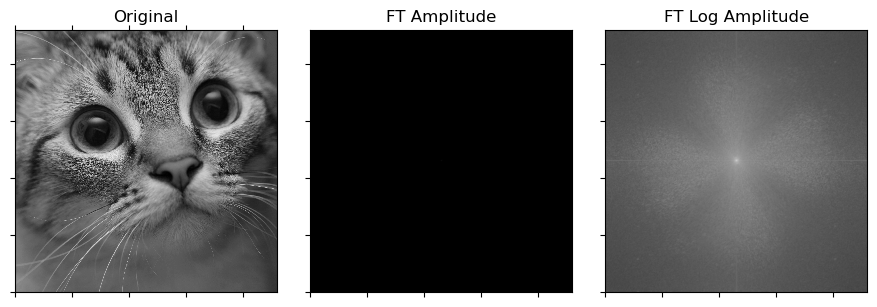

In [18]:
the_cat = np.load("the_cat.npy")
the_cat = np.flipud(the_cat)

plot_imgft(the_cat)

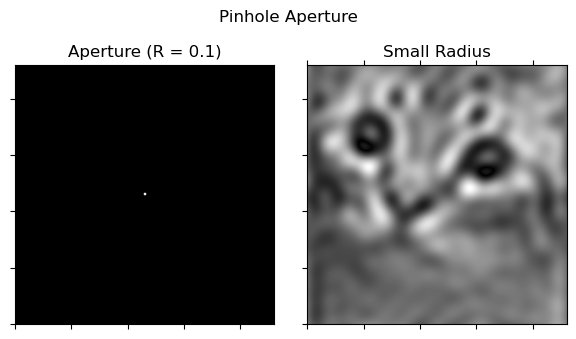

In [203]:
#Circle: Small Radius
out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer1 = 1
thickness1 = 1
r_inner1 = r_outer1 - thickness1
masked1 = ((Z <= r_outer1) & (Z>= r_inner1)) * out_ft
big_r = fft.fft2(masked1)
big_r = np.flipud(big_r)

r_outer2 = 0.1
thickness2 = 0.1
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].imshow((Z <0.1), cmap="gray", origin="lower")
axs[0].set_title("Aperture (R = 0.1)")
##
axs[1].matshow((np.flipud(np.abs(small_r))), cmap="gray", origin="lower")
axs[1].set_title("Small Radius")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Pinhole Aperture", x=0.5, y=1.1)
plt.savefig("Small Radius.png")

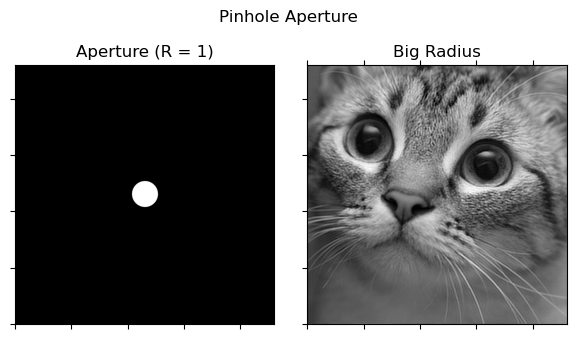

In [198]:
#Circle: Big Radius

out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer1 = 1
thickness1 = 1
r_inner1 = r_outer1 - thickness1
masked1 = ((Z <= r_outer1) & (Z>= r_inner1)) * out_ft
big_r = fft.fft2(masked1)
big_r = np.flipud(big_r)

r_outer2 = 0.1
thickness2 = 0.1
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[1].matshow((np.flipud(np.abs(big_r))), cmap="gray", origin="lower")
axs[1].set_title("Big Radius")
##
axs[0].imshow((Z <1), cmap="gray", origin="lower")
axs[0].set_title("Aperture (R = 1)")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Pinhole Aperture", x=0.5, y=1.1)
plt.savefig("Big Radius.png")

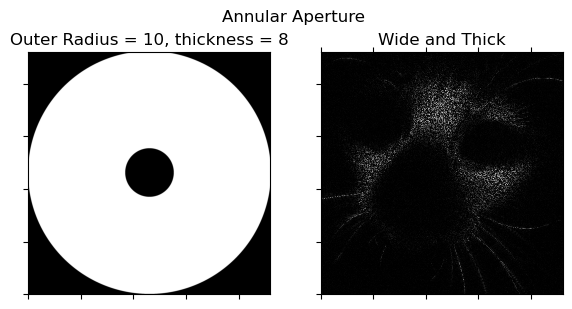

In [199]:
#Annulus: Wide and thick
out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer2 = 10
thickness2 = 8
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].imshow((Z <= r_outer2) & (Z>= r_inner2), cmap="gray", origin="lower")
axs[0].set_title(f"\nOuter Radius = {r_outer2}, thickness = {thickness2}")
##
axs[1].matshow((np.flipud(np.abs(small_r))), cmap="gray", origin="lower")
axs[1].set_title("Wide and Thick")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Annular Aperture", x=0.5, y=1)
plt.savefig("Wide and Thick.png")

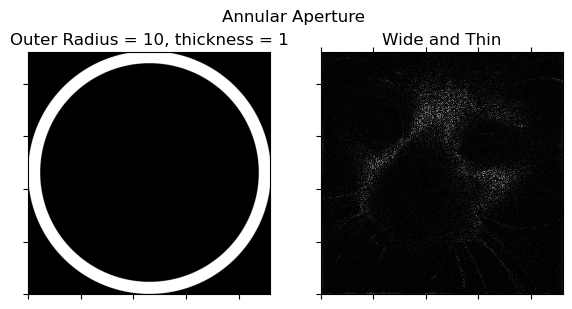

In [200]:
#Annulus: Wide and thin
out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer2 = 10
thickness2 = 1
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
##
axs[0].imshow((Z <= r_outer2) & (Z>= r_inner2), cmap="gray", origin="lower")
axs[0].set_title(f"\nOuter Radius = {r_outer2}, thickness = {thickness2}")
##
axs[1].matshow((np.flipud(np.abs(small_r))), cmap="gray", origin="lower")
axs[1].set_title("Wide and Thin")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Annular Aperture", x=0.5, y=1)
plt.savefig("Wide and Thin.png")

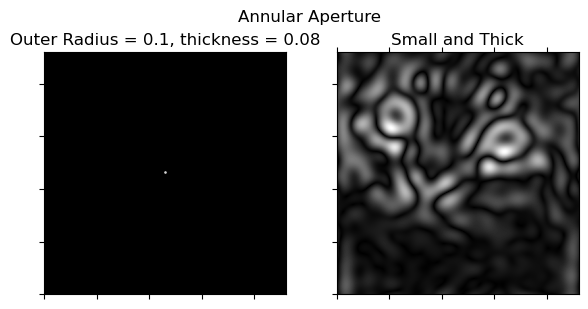

In [201]:
#Annulus: Small and Thick
out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer2 = 0.1
thickness2 = 0.080
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

##
axs[0].imshow((Z <= r_outer2) & (Z>= r_inner2), cmap="gray", origin="lower")
axs[0].set_title(f"\nOuter Radius = {r_outer2}, thickness = {thickness2}")
##
axs[1].matshow((np.flipud(np.abs(small_r))), cmap="gray", origin="lower")
axs[1].set_title("Small and Thick")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Annular Aperture", x=0.5, y=1)
plt.savefig("Small and Thick.png")

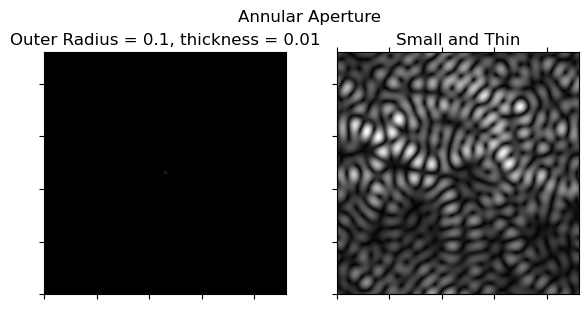

In [202]:
#Annulus: Small and Thin
out = np.load("the_cat.npy")
out_ft = fft.fft2(out)
out_ft = fft.fftshift(out_ft)

dim = np.linspace(-10,10, out.shape[0])
X, Y = np.meshgrid(dim,dim)

Z = np.sqrt(X**2 + Y**2)

r_outer2 = 0.1
thickness2 = 0.01
r_inner2 = r_outer2 - thickness2
masked2 = ((Z <= r_outer2) & (Z>= r_inner2)) * out_ft
small_r = fft.fft2(masked2)
small_r = np.flipud(small_r)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

##
axs[0].imshow((Z <= r_outer2) & (Z>= r_inner2), cmap="gray", origin="lower")
axs[0].set_title(f"\nOuter Radius = {r_outer2}, thickness = {thickness2}")
##
axs[1].matshow((np.flipud(np.abs(small_r))), cmap="gray", origin="lower")
axs[1].set_title("Small and Thin")
    ## Cosmetic
for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout()
plt.suptitle("Annular Aperture", x=0.5, y=1)
plt.savefig("Small and Thin.png")

Text(0.5, 1.0, 'Annulus\nOuter Radius = 10 cm, Thickness = 9 cm')

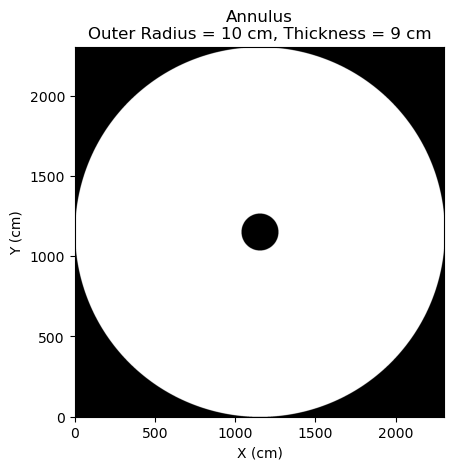

In [163]:

# Plot the annulus
plt.figure()
plt.imshow((Z <= r_outer) & (Z>= r_inner), cmap="gray", origin="lower")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
plt.title(f"Annulus\nOuter Radius = {r_outer} cm, Thickness = {thickness} cm")